In [4]:
#from osmapi import OsmApi
from bs4 import BeautifulSoup
from mechanize import ParseResponse, urlopen, urljoin
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [5]:
filename = 'map_extrasmall.osm'

In [6]:
data = {}
keys = []
ways = {}
wkeys = []
relations = {}
rkeys = []

hwTypes = ['motorway', 'trunk', 'primary', 'secondary', 'tertiary', 'pedestrian', 'unclassified', 'service','residential','living_street', 'track']


In [5]:
#def get_coords_from_node(node_href):
with open(filename) as file:
    soup = BeautifulSoup(file, ["lxml", "xml"])
 
#print soup.find_all('node')
print soup.find_all('way')
#lat=soup.find('span',{'class':re.compile('latitude')}).contents[0]
#lng=soup.find('span',{'class':re.compile('longitude')}).contents[0]
#print float(lat),float(lng)
    #return float(lat),float(lng)

[<way changeset="1056209" id="5673883" timestamp="2009-05-03T07:11:08Z" uid="119748" user="peace2" version="2" visible="true">
<nd ref="42461596"/>
<nd ref="42461598"/>
<nd ref="42461602"/>
<tag k="highway" v="footway"/>
<tag k="tiger:cfcc" v="A41"/>
<tag k="tiger:county" v="Kings, NY"/>
<tag k="tiger:reviewed" v="no"/>
<tag k="tiger:separated" v="no"/>
<tag k="tiger:source" v="tiger_import_dch_v0.6_20070829"/>
<tag k="tiger:tlid" v="59077511:59077521"/>
<tag k="tiger:upload_uuid" v="bulk_upload.pl-8a1a8f82-26aa-4f15-b5fe-a7476c89e45e"/>
</way>, <way changeset="3424751" id="5674241" timestamp="2009-12-22T04:45:26Z" uid="207745" user="NE2" version="2" visible="true">
<nd ref="42463541"/>
<nd ref="42463543"/>
<tag k="highway" v="track"/>
<tag k="surface" v="paved"/>
<tag k="tiger:cfcc" v="A41"/>
<tag k="tiger:county" v="Kings, NY"/>
<tag k="tiger:reviewed" v="no"/>
<tag k="tiger:separated" v="no"/>
<tag k="tiger:source" v="tiger_import_dch_v0.6_20070829"/>
<tag k="tiger:tlid" v="59100870

In [29]:
try:
    from xml.etree import cElementTree as ET
except ImportError, e:
    from xml.etree import ElementTree as ET


def extract_intersections(osm, verbose=True):
    # This function takes an osm file as an input. It then goes through each xml 
    # element and searches for nodes that are shared by two or more ways.
    # Parameter:
    # - osm: An xml file that contains OpenStreetMap's map information
    # - verbose: If true, print some outputs to terminal.
    # 
    # Ex) extract_intersections('WashingtonDC.osm')
    #
    tree = ET.parse(osm)
    root = tree.getroot()
    counter = {}
    way_counter = {}
    node_intersections = {}
    for child in root:
        if child.tag == 'way':
            hwstat = False
            way_node = []
            #while hwstat == False:
            for item in child:
                if item.tag == 'tag' and item.attrib['k'] == 'highway':
                    way_id = child.attrib['id']
               #     way_name = item.attrib['v'] pull some name data to save later!
                    hwstat = True
            if hwstat == True:
                for item in child:
                    if item.tag == 'nd':
                        nd_ref = item.attrib['ref']
                        way_node.append(nd_ref)
                        if not nd_ref in counter:
                            counter[nd_ref] = 0
                        counter[nd_ref] += 1
                        #way_counter[way_id] = []
                way_counter[way_id] = way_node
            else:
                hwstat = False
    # Find nodes that are shared with more than one way, which
    # might correspond to intersections
    intersections = filter(lambda x: counter[x] > 1,  counter)

    # Extract intersection coordinates
    # You can plot the result using this url.
    # http://www.darrinward.com/lat-long/
    intersection_coordinates = []
    for child in root:
        if child.tag == 'node' and child.attrib['id'] in intersections:
            coordinate = child.attrib['lat'] + ',' + child.attrib['lon']
            if verbose:
                print coordinate
            intersection_coordinates.append(coordinate)
            node_intersections[child.attrib['id']] = (child.attrib['lat'], child.attrib['lon'])

    return intersection_coordinates, way_counter, node_intersections

In [31]:
test = extract_intersections(filename, verbose= False)

In [35]:
int_string, ways, nodes = extract_intersections(filename, verbose= False)
#test = inters[1]
#float(test.split(',')[1])
def inters_latlong(string):
    lat_float = float(string.split(',')[0])
    long_float = float(string.split(',')[1])
    return [lat_float, long_float]

print inters_latlong(int_string[3])

[40.686641, -73.9798125]


In [36]:
import folium
map_osm = folium.Map(location=[40.69, -73.98],zoom_start=15)
for i in int_string[:]:
    i_loc = inters_latlong(i)
    map_osm.simple_marker(i_loc, popup='Mt. Hood Meadows')


        
        
map_osm.create_map(path = 'map.html')


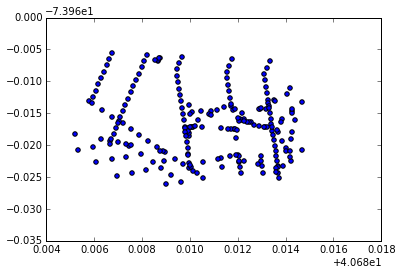

In [38]:
#plot the intersections!

for d in nodes:
    scatter(nodes[d][0],nodes[d][1])
    

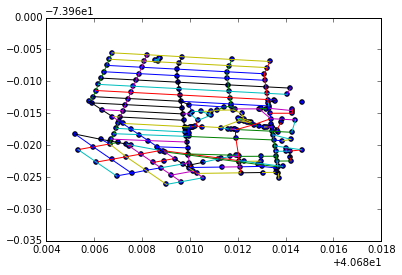

In [116]:
#determine the locations of the intersections asociated with a way.



for d in nodes:
    scatter(nodes[d][0],nodes[d][1])
    

for w in ways:
    node_list = []

    for i in ways[w]:
        if i in nodes: 
            node_list.append(nodes[i]) 
            
    plot(*zip(*node_list))

In [168]:
ways2 = {}
for w in ways:
    num_el = len(ways[w])
    if num_el == 2:
        ways2[w]=ways[w]
    elif num_el > 2:
        for j in range(0,num_el-1):
            
            new_list= [ways[w][j], ways[w][j+1]]
            ways2[w+str(j)] = new_list
            
print ways2['56755233']
#print ways2

['2494115142', '42469614']


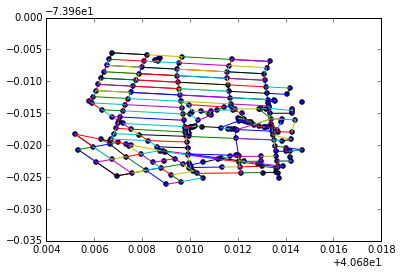

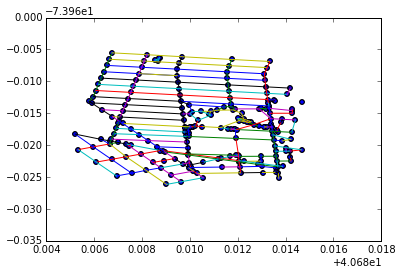

In [203]:
for d in nodes:
    scatter(nodes[d][0],nodes[d][1])
    

for w in ways2:
    node_list = []

    for i in ways2[w]:
        if i in nodes: 
            node_list.append(nodes[i]) 
            
    plot(*zip(*node_list))
show()

for d in nodes:
    scatter(nodes[d][0],nodes[d][1])
    

for w in ways:
    node_list = []

    for i in ways[w]:
        if i in nodes: 
            node_list.append(nodes[i]) 
            
    plot(*zip(*node_list))
for d in nodes:
    scatter(nodes[d][0],nodes[d][1])
    

node_list = []

for i in ways2['56755236']:
    if i in nodes: 
        node_list.append(nodes[i]) 
            
plot(*zip(*node_list))
show()
show()

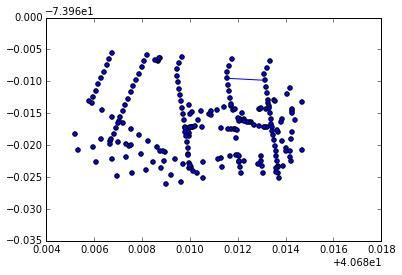

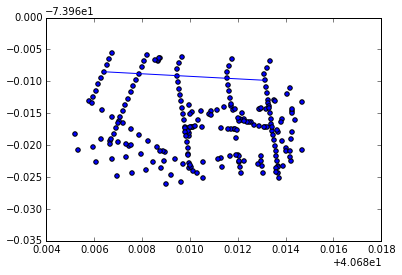

In [202]:
for d in nodes:
    scatter(nodes[d][0],nodes[d][1])
    

node_list = []

for i in ways2['56755234']:
    if i in nodes: 
        node_list.append(nodes[i]) 
            
plot(*zip(*node_list))
show()

for d in nodes:
    scatter(nodes[d][0],nodes[d][1])
    

node_list = []

for i in ways['5675523']:
    if i in nodes: 
        node_list.append(nodes[i]) 
            
plot(*zip(*node_list))
show()




In [167]:
ways2

{'100474427': ['1161507063', '2019066152'],
 '1073911040': ['42520242', '42492119'],
 '1073911041': ['42492119', '42521443'],
 '10739110410': ['42516539', '504044413'],
 '10739110411': ['504044413', '42499440'],
 '10739110412': ['42499440', '3446656846'],
 '10739110413': ['3446656846', '2484497668'],
 '10739110414': ['2484497668', '504044434'],
 '10739110415': ['504044434', '3191750033'],
 '10739110416': ['3191750033', '504044405'],
 '10739110417': ['504044405', '42466432'],
 '10739110418': ['42466432', '42478390'],
 '10739110419': ['42478390', '42487070'],
 '1073911042': ['42521443', '42469369'],
 '10739110420': ['42487070', '42500048'],
 '10739110421': ['42500048', '42469617'],
 '10739110422': ['42469617', '42467029'],
 '10739110423': ['42467029', '42488436'],
 '10739110424': ['42488436', '42470369'],
 '10739110425': ['42470369', '42511695'],
 '10739110426': ['42511695', '42504232'],
 '10739110427': ['42504232', '42521410'],
 '10739110428': ['42521410', '42521405'],
 '10739110429': [

In [209]:
def ways_to_edge(waydict):
    ways3 = {}
    for w in waydict:
        num_el = len(ways[w])
        new_w = []
        for i in ways[w]:
            if nodes.get(i) == None: 
                tmp = 0
            else:
                new_w.append(i)
        ways3[w] = new_w

    
    ways4 = {}
    for w in ways3:
        num_el = len(ways3[w])
        if num_el == 2:
            ways4[w]=ways3[w]
        elif num_el > 2:
            for j in range(0,num_el-1):
                new_list= [ways3[w][j], ways3[w][j+1]]
                ways4[w+str(j)] = new_list
    return ways4

In [213]:
ways_to_edge(ways)

{'1073911040': ['42478390', '42487070'],
 '1073911041': ['42487070', '42500048'],
 '10739110410': ['42521405', '42490932'],
 '10739110411': ['42490932', '1258945544'],
 '10739110412': ['1258945544', '42471615'],
 '10739110413': ['42471615', '42470439'],
 '10739110414': ['42470439', '42469245'],
 '10739110415': ['42469245', '42510188'],
 '10739110416': ['42510188', '1258875489'],
 '10739110417': ['1258875489', '42491585'],
 '1073911042': ['42500048', '42469617'],
 '1073911043': ['42469617', '42467029'],
 '1073911044': ['42467029', '42488436'],
 '1073911045': ['42488436', '42470369'],
 '1073911046': ['42470369', '42511695'],
 '1073911047': ['42511695', '42504232'],
 '1073911048': ['42504232', '42521410'],
 '1073911049': ['42521410', '42521405'],
 '109440614': ['1252839667', '1907676094'],
 '1094406150': ['1907676043', '1252844637'],
 '1094406151': ['1252844637', '42517021'],
 '109440618': ['42494847', '1907676039'],
 '110155725': ['1258875489', '42533021'],
 '1101557300': ['42491589', '1

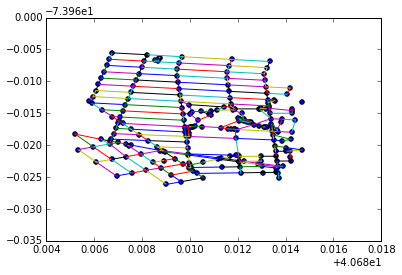

In [222]:
for d in nodes:
    scatter(nodes[d][0],nodes[d][1])
    
testway = ways_to_edge(ways)

for w in testway:
    #print w
    node_list = []
 

    for i in testway[w]:
        if i in nodes: 
            node_list.append(nodes[i]) 
            #print nodes[i]
#print node_list
    plot(*zip(*node_list))

show()

            
#print node_list
#plot(*zip(*node_list))
#show()